## データ読み込み

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/pbr/real/配当性向.csv')

df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '売上高', '売上総利益率', '営業CF/売上比率',
       '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE', '自己資本比率', '有利子負債/総資産',
       '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率', '総資産', '現金及び預金', '売上債権',
       '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債', '有利子負債', '純有利子負債',
       '純資産', '自己資本', 'フリーCF', '研究開発/売上比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率',
       'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産', '配当性向',
       '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

In [3]:
df['PER(会予)'].describe()

count    390.000000
mean      17.093333
std        8.530716
min        3.300000
25%       10.825000
50%       15.650000
75%       20.675000
max       49.800000
Name: PER(会予), dtype: float64

In [4]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '売上高', '売上総利益率', '営業CF/売上比率',
       '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE', '自己資本比率', '有利子負債/総資産',
       '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率', '総資産', '現金及び預金', '売上債権',
       '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債', '有利子負債', '純有利子負債',
       '純資産', '自己資本', 'フリーCF', '研究開発/売上比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率',
       'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産', '配当性向',
       '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

## SelectKBest(特徴量選択)

In [5]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '売上高', '売上総利益率', '営業CF/売上比率',
       '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE', '自己資本比率', '有利子負債/総資産',
       '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率', '総資産', '現金及び預金', '売上債権',
       '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債', '有利子負債', '純有利子負債',
       '純資産', '自己資本', 'フリーCF', '研究開発/売上比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率',
       'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産', '配当性向',
       '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

In [6]:
sub_df = df.drop(columns=['銘柄コード', '会社名', '時価総額',
                          '売上高', '営業利益', '当期純利益',
                          '純利益率', '総資産', '現金及び預金',
                          '売上債権', '棚卸資産', '有形固定資産',
                          '固定負債', '有利子負債', '純有利子負債',
                          '純資産', '自己資本', 'フリーCF',
                          '研究開発/売上比率', 'DEレシオ',
                          '売上債権回転数', '棚卸資産回転数'])

r_df = df.drop(columns=['時価総額',
                          '売上高', '営業利益', '当期純利益',
                          '純利益率', '総資産', '現金及び預金',
                          '売上債権', '棚卸資産', '有形固定資産',
                          '固定負債', '有利子負債', '純有利子負債',
                          '純資産', '自己資本', 'フリーCF',
                          '研究開発/売上比率', 'DEレシオ',
                          '売上債権回転数', '棚卸資産回転数'])
sub_df.columns

Index(['PER(会予)', 'PBR', '売上総利益率', '営業CF/売上比率', '営業利益率', 'ROE', '自己資本比率',
       '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', '流動比率', '固定ネットキャッシュ',
       '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産',
       '配当性向', '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

In [7]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#r_df = df[['PER(会予)', '営業CF/売上比率', '営業利益率', 'ROE',
#           '自己資本比率', '有利子負債/総資産', 'ネットキャッシュ比率',
#           '固定ネットキャッシュ比率', '有形固定資産/総資産',
#           '固定負債/総資産', 'PBR']]

sub_df.dropna(inplace=True)

X = sub_df.drop(columns=['PBR'])
y = sub_df['PBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SelectKBestでf_regressionを使用
selector = SelectKBest(f_regression, k=7)
X_new = selector.fit_transform(X_train, y_train)

print(selector.get_support())  #選ばれた特徴量

[ True  True  True  True  True False False False False False False  True
 False  True False False False False False]


In [8]:
X.columns

Index(['PER(会予)', '売上総利益率', '営業CF/売上比率', '営業利益率', 'ROE', '自己資本比率', '有利子負債/総資産',
       '有利子負債/時価総額', '純有利子負債/時価総額', '流動比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率',
       'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産', '配当性向',
       '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

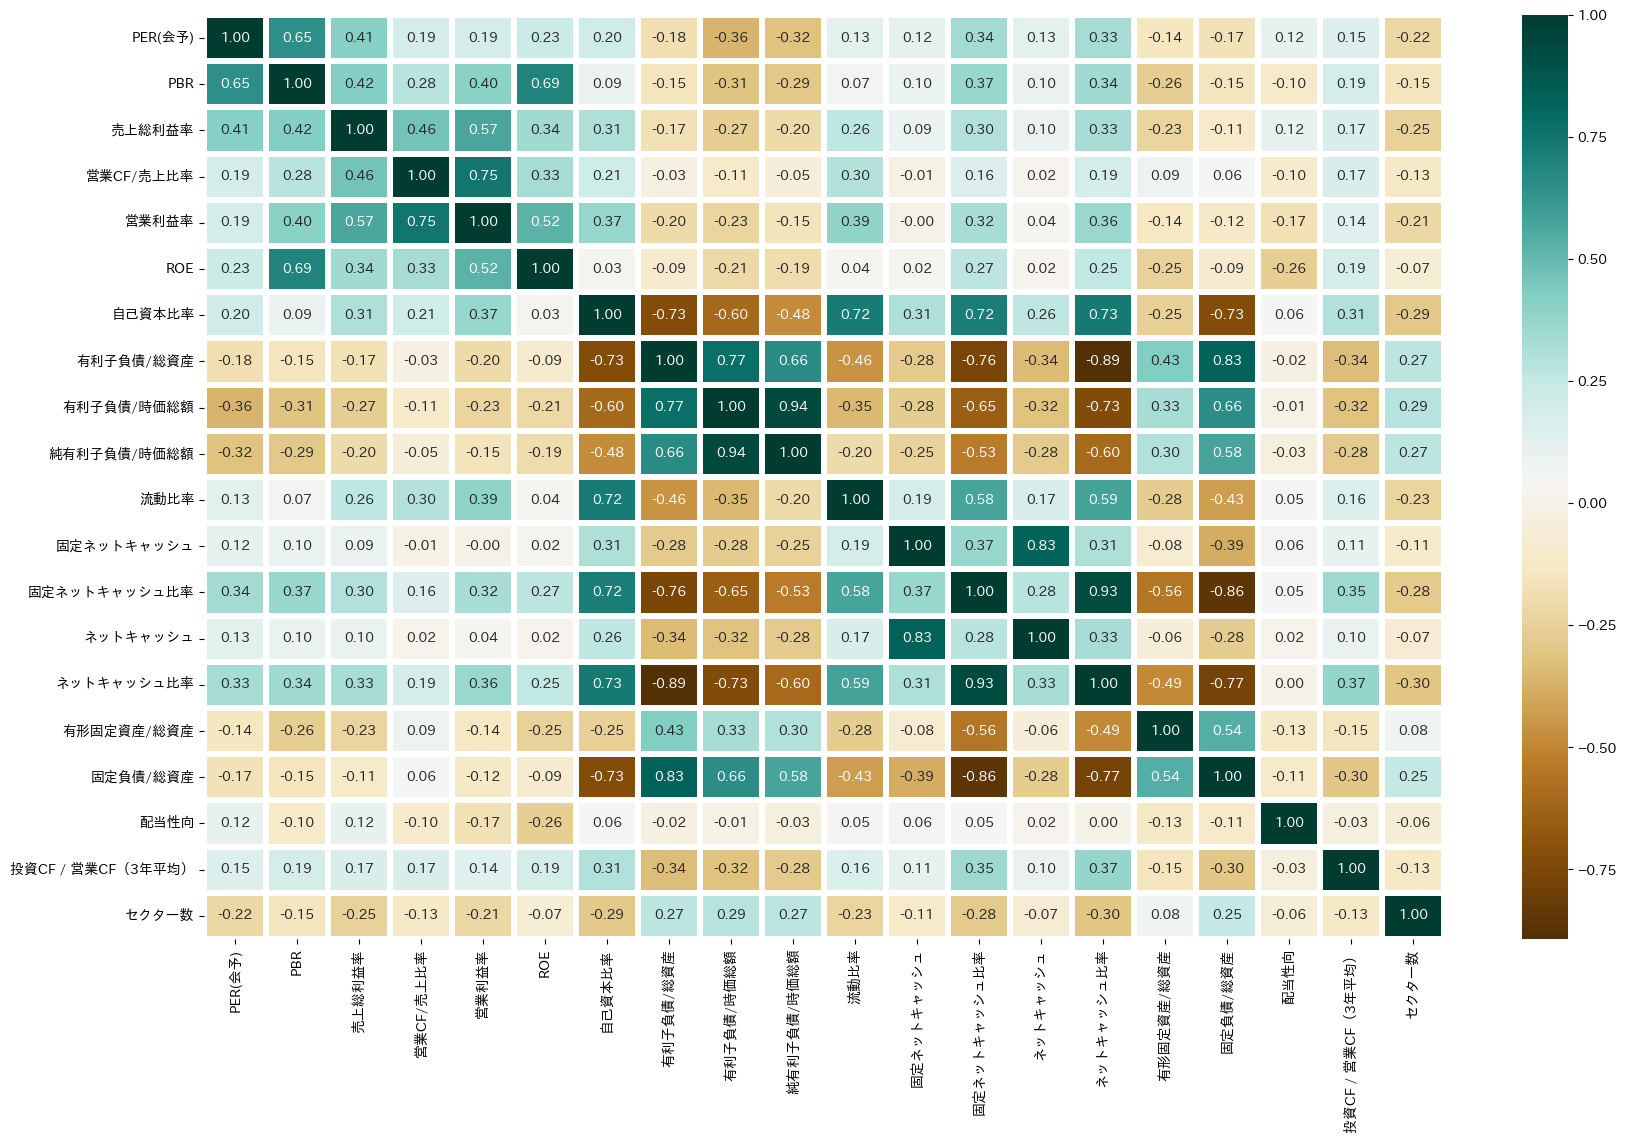

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = sub_df.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

## X, yに分割

In [10]:
sub_df.shape

(350, 20)

In [11]:
r_df.shape

(390, 22)

In [12]:
r_df.head()

,銘柄コード,会社名,PER(会予),PBR,売上総利益率,営業CF/売上比率,営業利益率,ROE,自己資本比率,有利子負債/総資産,...,流動比率,固定ネットキャッシュ,固定ネットキャッシュ比率,ネットキャッシュ,ネットキャッシュ比率,有形固定資産/総資産,固定負債/総資産,配当性向,投資CF / 営業CF（3年平均）,セクター数
0,2914,本たばこ産業,17.7,2.1,55.3,20.0,10.3,4.8,45.0,20.6,...,166.5,-1288831,-15.396873,-642221,-7.672220,10.843735,28.353530,192.20,0.00,4
1,6098,リクルートHD,30.4,6.8,57.5,15.7,11.8,19.7,61.8,6.9,...,203.5,532924,18.321158,671066,23.070280,1.995366,11.650480,8.80,-10.23,3
2,6501,立製作所,23.7,2.9,28.8,12.0,9.9,10.5,44.0,6.3,...,111.7,-479309,-3.607947,28944,0.217873,10.098275,10.128490,28.30,-18.58,4
3,6758,ソニーG,20.8,2.7,28.2,12.2,10.7,11.9,22.7,5.8,...,68.2,-13888594,-38.588489,403754,1.121802,4.242043,45.512195,10.60,-70.00,6
4,7011,三菱重工業,39.1,4.0,20.0,7.1,NaN,9.5,34.2,0.0,...,120.1,-476059,-6.975004,542003,7.941186,13.701400,14.916189,31.49,-38.65,4


In [13]:
r_df.columns

Index(['銘柄コード', '会社名', 'PER(会予)', 'PBR', '売上総利益率', '営業CF/売上比率', '営業利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', '流動比率',
       '固定ネットキャッシュ', '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産',
       '固定負債/総資産', '配当性向', '投資CF / 営業CF（3年平均）', 'セクター数'],
      dtype='object')

In [14]:

# X =  PER、売上総利益率, 営業利益率, ROE, 固定ネットキャッシュ比率
r_df = r_df[['銘柄コード', '会社名', 'PER(会予)','ROE',
             '固定ネットキャッシュ比率', 'PBR', '自己資本比率',
             '有形固定資産/総資産', 'ネットキャッシュ比率', '配当性向', '投資CF / 営業CF（3年平均）', 'セクター数']]

r_df.head()

,銘柄コード,会社名,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率,配当性向,投資CF / 営業CF（3年平均）,セクター数
0,2914,本たばこ産業,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220,192.20,0.00,4
1,6098,リクルートHD,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280,8.80,-10.23,3
2,6501,立製作所,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873,28.30,-18.58,4
3,6758,ソニーG,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802,10.60,-70.00,6
4,7011,三菱重工業,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186,31.49,-38.65,4


In [15]:
r_df.shape

(390, 12)

In [16]:
r_df.isna().sum()

銘柄コード                 0
会社名                   0
PER(会予)               0
ROE                   7
固定ネットキャッシュ比率          0
PBR                   0
自己資本比率                0
有形固定資産/総資産            0
ネットキャッシュ比率            0
配当性向                  3
投資CF / 営業CF（3年平均）    10
セクター数                 0
dtype: int64

In [17]:
r_df.dropna(inplace=True)
company_names = r_df[['銘柄コード', '会社名']]

r_df = r_df.drop(columns=['銘柄コード', '会社名'])

r_df.shape

(375, 10)

In [18]:
company_names.shape

(375, 2)

In [19]:
r_df.head()

,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率,配当性向,投資CF / 営業CF（3年平均）,セクター数
0,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220,192.20,0.00,4
1,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280,8.80,-10.23,3
2,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873,28.30,-18.58,4
3,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802,10.60,-70.00,6
4,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186,31.49,-38.65,4


In [20]:
X = r_df[['PER(会予)', 'ROE', '自己資本比率', '固定ネットキャッシュ比率', '配当性向']]
# X = r_df.drop(columns=['PBR', '売上総利益率', '自己資本比率'])
y = r_df['PBR']

corr = r_df[['PER(会予)', 'ROE', '自己資本比率', '固定ネットキャッシュ比率', '配当性向','PBR']]

In [21]:
X.shape

(375, 5)

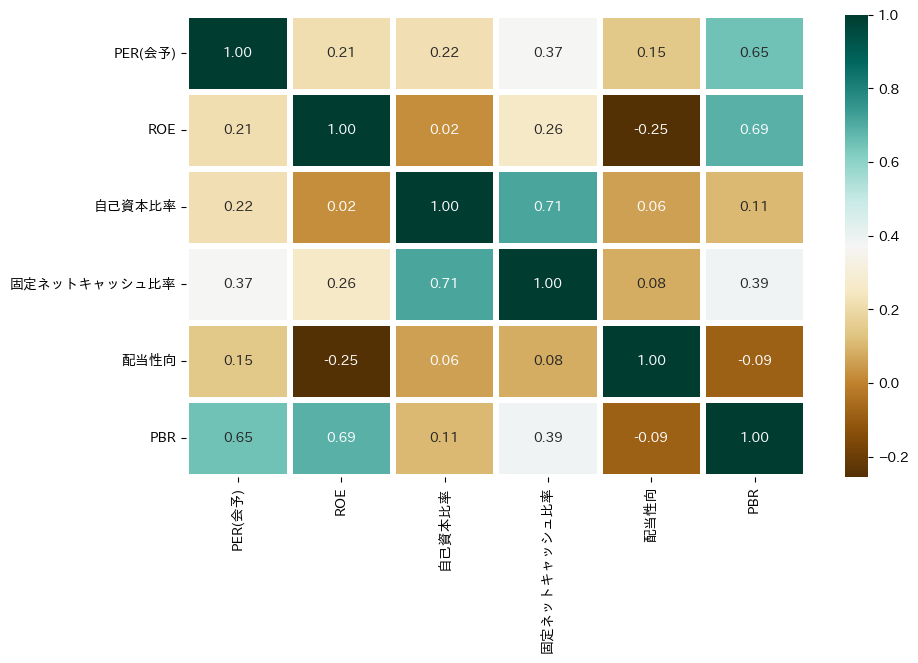

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = corr.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

## モデル構築

### パラメータ探索（グリッドサーチ）

In [23]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# パイプラインの構築（スケーリング + XGBoost回帰）
pipeline = make_pipeline(
    StandardScaler(),
    XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)
)

# ハイパーパラメータグリッド（XGBRegressorのパラメータに合わせて記述）
param_grid = {
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.3],
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__subsample': [0.7, 0.9, 1.0],
    'xgbregressor__colsample_bytree': [0.7, 0.9, 1.0],
    'xgbregressor__reg_alpha': [0, 0.1, 1],
    'xgbregressor__reg_lambda': [1, 5, 10]
}

# グリッドサーチ設定（5分割交差検証でR²スコアを評価指標とする）
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# モデルをデータにフィット（X: 特徴量, y: 目的変数）
grid_search.fit(X, y)

# 最良モデルとそのスコアを表示
print("ベストスコア（R²）:", grid_search.best_score_)
print("ベストパラメータ:")
for key, value in grid_search.best_params_.items():
    print(f"  {key}: {value}")


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
ベストスコア（R²）: 0.8081837783469907
ベストパラメータ:
  xgbregressor__colsample_bytree: 0.9
  xgbregressor__learning_rate: 0.1
  xgbregressor__max_depth: 3
  xgbregressor__n_estimators: 100
  xgbregressor__reg_alpha: 0.1
  xgbregressor__reg_lambda: 5
  xgbregressor__subsample: 0.7


### 交差検証

### XGBoost

In [24]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# GridSearchCVの結果から得られた最良パラメータをここに記述（例として記入）
best_params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.7,
    'colsample_bytree': 0.9,
    'reg_alpha': 0.1,
    'reg_lambda': 5,
}

# 最良パラメータを使ったXGBoost回帰モデルとスケーラーのパイプライン
pipeline = make_pipeline(
    StandardScaler(),
    XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        verbosity=0,
        **best_params
    )
)

# 1. 決定係数 (R²)
r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {:.4f}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # 負の値を正に戻す
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
print('平均二乗誤差 (MSE): {:.4f}'.format(np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
print('平均絶対誤差 (MAE): {:.4f}'.format(np.mean(mae_scores)))


決定係数 (R²) scores: [0.88792076 0.80792768 0.83896055 0.73385037 0.77225954]
平均決定係数 (R²): 0.8082
平均二乗誤差 (MSE) scores: [0.65386652 1.56979123 0.39156606 1.87783637 0.69034713]
平均二乗誤差 (MSE): 1.0367
平均絶対誤差 (MAE) scores: [0.41985011 0.57022855 0.4092126  0.55871217 0.46076202]
平均絶対誤差 (MAE): 0.4838


### 予測モデル構築

In [25]:
company_names_col = company_names[['銘柄コード','会社名']]

company_names_col

,銘柄コード,会社名
0,2914,本たばこ産業
1,6098,リクルートHD
2,6501,立製作所
3,6758,ソニーG
4,7011,三菱重工業
...,...,...
385,7451,三菱食品
386,8242,エイチ･ツー･オーリテイリング
387,8273,イズミ
388,9744,メイテックGHD


In [26]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# GridSearchCVの結果から得られた最良パラメータをここに記述（例として記入）
best_params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.7,
    'colsample_bytree': 1.0,
    'reg_alpha': 0,
    'reg_lambda': 10,
}

# 最良パラメータを使ったXGBoost回帰モデルとスケーラーのパイプライン
pipe_lr = make_pipeline(
    StandardScaler(),
    XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        verbosity=0,
        **best_params
    )
)

sc = StandardScaler()
X_sc = sc.fit_transform(X)
pipe_lr.fit(X_sc, y)
lr_pred = pipe_lr.predict(X_sc)


r_df['予測PBR'] = lr_pred
r_df['予測誤差'] = r_df['PBR'] - lr_pred
r_df['PBRレシオ'] =  lr_pred / r_df['PBR']
r_df[['銘柄コード', '会社名']] = company_names_col


r_df.head(10)

,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率,配当性向,投資CF / 営業CF（3年平均）,セクター数,予測PBR,予測誤差,PBRレシオ,銘柄コード,会社名
0,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220,192.20,0.00,4,1.308468,0.791532,0.623080,2914,本たばこ産業
1,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280,8.80,-10.23,3,7.023899,-0.223899,1.032926,6098,リクルートHD
2,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873,28.30,-18.58,4,2.520694,0.379306,0.869205,6501,立製作所
3,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802,10.60,-70.00,6,2.435968,0.264032,0.902210,6758,ソニーG
4,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186,31.49,-38.65,4,3.977372,0.022628,0.994343,7011,三菱重工業
5,8.1,13.8,-21.221911,1.0,37.9,16.271369,-33.054896,25.00,-99.26,3,1.033528,-0.033528,1.033528,7203,トヨタ自動車
6,11.1,15.3,-25.157451,1.7,38.0,14.744014,-44.903221,32.50,-40.37,7,1.408686,0.291314,0.828639,8001,伊藤忠商事
7,17.1,29.6,12.315169,5.3,70.1,16.820609,15.850838,50.10,-23.32,1,5.037506,0.262494,0.950473,8035,東京エレクトロン
8,15.0,10.1,-18.245809,1.1,43.6,13.365264,-32.942835,42.20,-13.36,6,1.458915,-0.358915,1.326286,8058,三菱商事
9,11.4,12.6,-28.661270,1.2,33.2,34.204582,0.278489,43.50,-81.55,4,1.279739,-0.079739,1.066449,9432,本電信電話


### モデル評価

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_lr = XGBRegressor()
xgb_lr.fit(X_train, y_train)
xgb_pred = xgb_lr.predict(X_test)


# 評価指標の表示
print("決定係数 (R²):", r2_score(y_test, xgb_pred))
print("平均二乗誤差 (MSE):", mean_squared_error(y_test, xgb_pred))
print("平均絶対誤差 (MAE):", mean_absolute_error(y_test, xgb_pred))

決定係数 (R²): 0.8742387674479164
平均二乗誤差 (MSE): 0.4997615000549833
平均絶対誤差 (MAE): 0.4754658764203389


### 特徴量重要度（Feature-Importance）

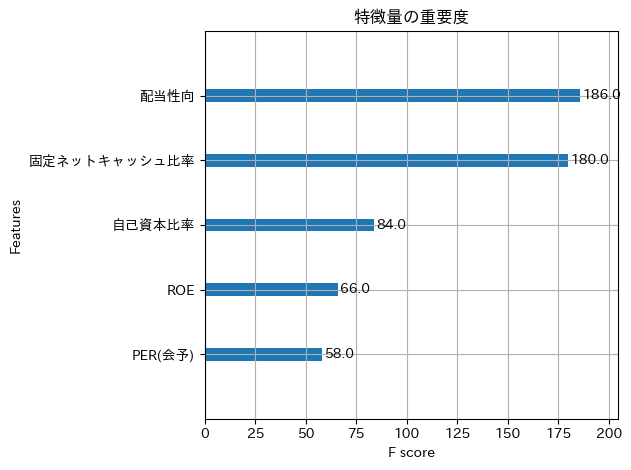

In [28]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# パイプラインから XGBRegressor モデルを取り出す
xgb_model = pipe_lr.named_steps['xgbregressor']

# 特徴量の重要度を可視化
plot_importance(xgb_model)
plt.yticks(range(len(X.columns)), X.columns)
plt.title('特徴量の重要度')
plt.tight_layout()
plt.show()

## 部分従属プロット

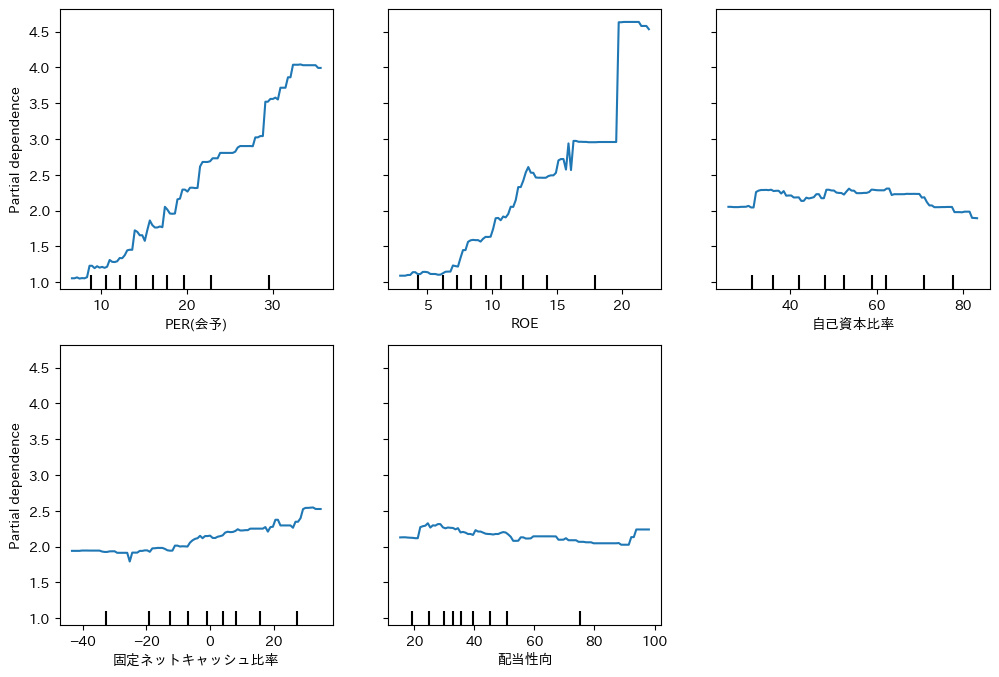

In [34]:
from sklearn.inspection import PartialDependenceDisplay

features = [0,1,2,3,4]

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(xgb_lr, X_train,  features, feature_names=X.columns, ax=ax)
plt.show()


## データを入力して予測

### 実績(ポートフォリオ)

In [30]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['サンリオ', '円谷フィールズ']

# 特徴量データ 予想PER, ROE, 自己資本比率, 固定ネットキャッシュ比率,)
X_new = np.array([
    [38.3, 39.0, 52.9, 36.29, 30.01],
    [11.9, 21.9, 51.6, 15.18, 28.00],
])

# 特徴量名 (4つに合わせる)
feature_names = list(X.columns)

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = pipe_lr.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred
# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
result_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,会社名,PER(会予),ROE,自己資本比率,固定ネットキャッシュ比率,配当性向,予測PBR
0,サンリオ,38.3,39.0,52.9,36.29,30.01,13.608719
1,円谷フィールズ,11.9,21.9,51.6,15.18,28.00,2.750291


In [31]:
result_df['PBR(実績)'] = [15.0, 2.6]

result_df

,会社名,PER(会予),ROE,自己資本比率,固定ネットキャッシュ比率,配当性向,予測PBR,PBR(実績)
0,サンリオ,38.3,39.0,52.9,36.29,30.01,13.608719,15.0
1,円谷フィールズ,11.9,21.9,51.6,15.18,28.00,2.750291,2.6


### 予想（ポートフォリオ）

In [32]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['明豊ファシリティワークス', 'AREHD', '湖北工業', 'アドバンテッジリスクマネジメント', '相鉄HD',
                 'ナレルグループ', 'NexTone', 'グリーンズ', 'インテG']

# 特徴量データ 予想PER, ROE, 自己資本比率, 固定ネットキャッシュ比率,)
X_new = np.array([
    [15, 17, 69.5, 0],      # 明豊ファシリティワークス
    [12, 15, 50, -7],       # AREHD
    [25, 20, 83.3, 14.23],      # 湖北工業
    [17.5, 23, 44.8, -1.64],   # アドバンテッジリスクマネジメント
    [10.0, 12.3, 24.0, -54.81],   # 相鉄HD
    [15, 16.2, 58.7, 2.56],    # ナレルグループ
    [25, 25.22, 32.1, 61.25], # NexTone
    [12, 30, 29.4, -9.09], # グリーンズ
    [20, 30, 94.1, 89.38], # インテG
])

# 特徴量名 (4つに合わせる)
feature_names = list(X.columns)

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = pipe_lr.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred

# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
result_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but StandardScaler is expecting 5 features as input.

In [ ]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [15.8, 20, 32.1, 61.25],  # NexTone(ROE抑えめ)
     [18.2, 10.4, 55.4, 36.96], # 日水コン
     [17.8, 15.2, 76.8, 48.88], # インターメスティック
     [10.2, 7.1, 48.2, 10.72], # ワッツ
     [19.6, 2.3, 80.3, 43.73], # はてな
     [12.4, 15.3, 79.5, 19.38], # アイティーフォー
     [6.6, 6.9, 41.5, -35.82], # アサックス
     [6.7, 40, 36.6, -3.96], # グリーンズ
     [14.4, 15.5, 82, 63.36], # 福井コンピュータHD
     [8.5, 14.8, 45, 13.34], # CSS HD
     [13.7, 10.5, 71.1, 35.82], # ウィッツ
     [6.7, 35, 29.4, -9.09],
     [16, 11.8, 47.9, -10.01], # エリアリンク
     
])


X_new_sc = sc.transform(X_new)

lr_pred = pipe_lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.1137075, 2.1808987, 3.2529197, 1.0958973, 2.0342023, 1.4099857,
       0.4575522, 3.7916565, 1.4433291, 1.4798715, 1.9507859, 3.785083 ,
       2.3292398], dtype=float32)

In [ ]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [17, 11.8, 17.2, -37.14],  # NexTone(ROE抑えめ)
     [15.6, 20, 75, 24.47], # 湖北工業(24.12通期)
     [15.6, 15, 50, 40], # 湖北工業（改善後）
     [12.2, 19.03, 44.8, -1.64],
     [6.7, 30, 29.4, -9.09], # グリーンズ
     [6.7, 30, 45, 50],
     [12.2, 19.03, 44.8, -1.64], 
     [36, 39, 52.9, 36.29],
     [15.6, 23.62, 54.9, -9.38], # カチタス
     [7.4, 8.6, 34.6, -37.35], # コーナン商事
     [16.2, 6.8, 69.8, 7.23], # スカパー
     [17, 14.3, 35.7, 0.23], # 大成建設
     [12.9, 10, 36.4, -3.62], # 鹿島建設
     [15, 6.5, 49.2, -18.56], # 日本製鐵
     [10.9, 13.5, 31.2, -20.69], # ANA HD
     [29.5, 21.6, 29.7, 46.78]
])


X_new_sc = sc.transform(X_new)

lr_pred = pipe_lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 1.91872   ,  3.1266606 ,  2.4467902 ,  1.6832741 ,  2.3030896 ,
        4.794237  ,  1.6832741 , 13.457944  ,  3.1119952 ,  0.78635705,
        1.0920112 ,  2.1877532 ,  1.2912678 ,  1.0501323 ,  1.2232054 ,
        8.738368  ], dtype=float32)

In [ ]:
3 / 2.5

1.2

In [ ]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [20.2, 23.2, 76.4, 56.50], # 日本M&Aセンター
     [15.8, 11, 82.9, 85.1], # M&Aキャピタルパートナーズ
     [21.1, 54.6, 82, 85.12], # M&A総研HD
     [16.4, 30, 94.1, 89.38], # インテG
     [12.5, 26.8, 85.1, 77.82], # ストライク
     [11, 16, 76.8, 38.48], # 山田コンサルティング
     [11.58, 18.48, 40.61, 10.08]
])


X_new_sc = sc.transform(X_new)

lr_pred = pipe_lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([6.2209125, 1.5987628, 8.736777 , 5.370732 , 3.6847708, 1.9014528,
       2.0344737], dtype=float32)

In [ ]:
df = pd.DataFrame({
    'name' : ['日本M&Aセンター', 'M&Aキャピタルパートナーズ', 'M&A総研', 'インテG', 'ストライク', '山田コンサルティング'],
    'ROE' : [23.2, 11.0, 54.6, 35.6, 26.8, 16.0],
    'PER' : [20.2, 15.8, 21.1, 16.4, 12.5, 11.0],
    'PBR': [4.7, 2.1, 7.9, 2.7, 3.8, 1.7]
})

df['予測PBR'] = lr_pred

df['PBR-Ratio'] = df['予測PBR'] / df['PBR']

df

ValueError: Length of values (7) does not match length of index (6)

In [ ]:
df.to_csv('コンサル.csv', index=False)